In [1]:
%matplotlib inline

import save
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.show_config()

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.


lapack_mkl_info:
    include_dirs = ['/proj/learning/software/anaconda/envs/py3k/include']
    define_macros = [('SCIPY_MKL_H', None)]
    libraries = ['mkl_lapack95_lp64', 'mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/proj/learning/software/anaconda/envs/py3k/lib']
lapack_opt_info:
    include_dirs = ['/proj/learning/software/anaconda/envs/py3k/include']
    define_macros = [('SCIPY_MKL_H', None)]
    libraries = ['mkl_lapack95_lp64', 'mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/proj/learning/software/anaconda/envs/py3k/lib']
mkl_info:
    include_dirs = ['/proj/learning/software/anaconda/envs/py3k/include']
    define_macros = [('SCIPY_MKL_H', None)]
    libraries = ['mkl_intel_lp64', 'mkl_intel_thread', 'mkl_core', 'iomp5', 'pthread']
    library_dirs = ['/proj/learning/software/anaconda/envs/py3k/lib']
blas_mkl_info:
    include_dirs = ['/proj/learning/software/anaconda/envs/py3k/include']


Package: mkl
Message: trial mode expires in 30 days


In [2]:
from imp import reload
reload(save)
word_vecs = save.load2("../../synsetw2v/synsetw2vmat.pkl")

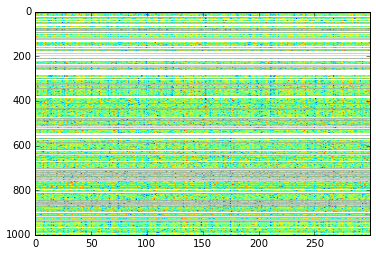

In [3]:
%matplotlib inline
plt.imshow(word_vecs, aspect="auto")

In [4]:
image_vecs, image_labels = save.load2("../../vectors/imgvecs.pkl")

In [5]:
image_labels_flat = image_labels.ravel().astype('int')

In [7]:
img_inds_keep     = np.invert(np.isnan(word_vecs[image_labels_flat,0]))

print("%g fraction of images kept" % (np.mean(img_inds_keep)))

image_vecs_keep   = image_vecs[img_inds_keep,:]
image_labels_keep = image_labels_flat[img_inds_keep]

0.637 fraction of images kept


In [ ]:
import devise
reload(devise)
devise.run_devise(image_vecs_keep, image_labels_keep, word_vecs,
                  n_epochs=100,
                  checkpoint_file="devise_real_cp.pkl",
                  iters_per_checkpoint=10000,
                  iters_per_eval=10000,
                  validation_inds=np.arange(0,10000,100))